In [1]:
# Imported the required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loaded the Dataset
df=pd.read_csv("Bike_Rent1.csv")

In [3]:
#Dataframe
df

,Index,Date,Season,Year,Month,Hour,Holiday,Weekday,Workingday,Weathersit,Temp,Atemp,Humidity,Windspeed,Casual,Registered,Count
0,1,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,2,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,3,01-01-2011,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,?,0,5,27,32
3,4,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,5,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,31-12-2012,springer,2012,12,19,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,11,108,119
17375,17376,31-12-2012,springer,2012,12,20,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,8,81,89
17376,17377,31-12-2012,springer,2012,12,21,No,1,Working Day,Clear,?,0.2576,0.6,0.1642,7,83,90
17377,17378,31-12-2012,springer,2012,12,22,No,1,Working Day,Clear,0.26,0.2727,0.56,0.1343,13,48,61


In [4]:
#Checking the shape of rows and columns
df.shape

(17379, 17)

In [5]:
#Quick summary of Dataframe df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Index       17379 non-null  int64 
 1   Date        17379 non-null  object
 2   Season      17379 non-null  object
 3   Year        17379 non-null  object
 4   Month       17379 non-null  object
 5   Hour        17379 non-null  int64 
 6   Holiday     17379 non-null  object
 7   Weekday     17379 non-null  int64 
 8   Workingday  17379 non-null  object
 9   Weathersit  17379 non-null  object
 10  Temp        17379 non-null  object
 11  Atemp       17379 non-null  object
 12  Humidity    17379 non-null  object
 13  Windspeed   17379 non-null  object
 14  Casual      17379 non-null  object
 15  Registered  17379 non-null  object
 16  Count       17379 non-null  int64 
dtypes: int64(4), object(13)
memory usage: 2.3+ MB


In [6]:
#Dropped Index Column
df.drop("Index",axis=1,inplace=True)

In [7]:
#Converted the Date column to DateTime Datatype
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

In [8]:
#Set the Date column as an index
df.set_index('Date', inplace=True)

In [9]:
# Dropping of casual and registered column Because it can cause target leakage Count = Casual + Registered
df.drop(columns=['Casual', 'Registered'], inplace=True)

In [10]:
#Dataframe
df

,Season,Year,Month,Hour,Holiday,Weekday,Workingday,Weathersit,Temp,Atemp,Humidity,Windspeed,Count
Date,,,,,,,,,,,,,
2011-01-01,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,16
2011-01-01,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,40
2011-01-01,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,?,0,32
2011-01-01,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,13
2011-01-01,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31,springer,2012,12,19,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,119
2012-12-31,springer,2012,12,20,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,89
2012-12-31,springer,2012,12,21,No,1,Working Day,Clear,?,0.2576,0.6,0.1642,90


In [11]:
df.duplicated().sum()

np.int64(2)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
#Replace all the ? symbol with NaN so that it will recognize the missing values.
df.replace('?', np.nan, inplace=True)

In [14]:
#Count of null values for each column
df.isna().sum()

Season         6
Year           1
Month          1
Hour           0
Holiday        1
Weekday        0
Workingday     5
Weathersit     4
Temp          11
Atemp          6
Humidity       6
Windspeed      5
Count          0
dtype: int64

In [15]:
#Converting the column in its acual datatype (For numeric columns) and then filled the null values with its median
for col in ['Month', 'Year', 'Temp', 'Atemp', 'Humidity', 'Windspeed']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col].fillna(df[col].median(),inplace=True)

In [16]:
#Imputation of all null values with mode (For categorical Columns)
for col in ['Season', 'Holiday', 'Workingday', 'Weathersit']:
  df[col].fillna(df[col].mode()[0],inplace=True)

In [17]:
#Conversion of object column to its actual datatype (Integer)
for col in ['Year', 'Month']:
  df[col] = df[col].astype(int)

In [18]:
#Dataframe,.... we can see all the null values are replaced with median and mode respectively.
df

,Season,Year,Month,Hour,Holiday,Weekday,Workingday,Weathersit,Temp,Atemp,Humidity,Windspeed,Count
Date,,,,,,,,,,,,,
2011-01-01,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0.0000,16
2011-01-01,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.80,0.0000,40
2011-01-01,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,0.63,0.0000,32
2011-01-01,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0.0000,13
2011-01-01,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31,springer,2012,12,19,No,1,Working Day,Mist,0.26,0.2576,0.60,0.1642,119
2012-12-31,springer,2012,12,20,No,1,Working Day,Mist,0.26,0.2576,0.60,0.1642,89
2012-12-31,springer,2012,12,21,No,1,Working Day,Clear,0.50,0.2576,0.60,0.1642,90


In [19]:
#Checking the count of null values now it is 0 so imputation is performed well
df.isna().sum()

Season        0
Year          0
Month         0
Hour          0
Holiday       0
Weekday       0
Workingday    0
Weathersit    0
Temp          0
Atemp         0
Humidity      0
Windspeed     0
Count         0
dtype: int64

In [20]:
#Again we see the quick summary of updated dataframe with proper columns, no null values and actual Datatype respectively.
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17377 entries, 2011-01-01 to 2012-12-31
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      17377 non-null  object 
 1   Year        17377 non-null  int64  
 2   Month       17377 non-null  int64  
 3   Hour        17377 non-null  int64  
 4   Holiday     17377 non-null  object 
 5   Weekday     17377 non-null  int64  
 6   Workingday  17377 non-null  object 
 7   Weathersit  17377 non-null  object 
 8   Temp        17377 non-null  float64
 9   Atemp       17377 non-null  float64
 10  Humidity    17377 non-null  float64
 11  Windspeed   17377 non-null  float64
 12  Count       17377 non-null  int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 1.9+ MB


In [21]:
#Statistical summary of numerical columns
df.describe()

,Year,Month,Hour,Weekday,Temp,Atemp,Humidity,Windspeed,Count
count,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000
mean,2011.502618,6.537147,11.547505,3.003568,0.497139,0.475859,0.627196,0.190092,189.483916
std,0.500008,3.438474,6.914438,2.005744,0.192461,0.171799,0.192911,0.122306,181.387645
min,2011.000000,1.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2011.000000,4.000000,6.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,2012.000000,7.000000,12.000000,3.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,2012.000000,10.000000,18.000000,5.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,2012.000000,12.000000,23.000000,6.000000,1.000000,1.000000,1.000000,0.850700,977.000000


# **Visualization**

**1. Histogram – Target Variable Distribution (Count)**

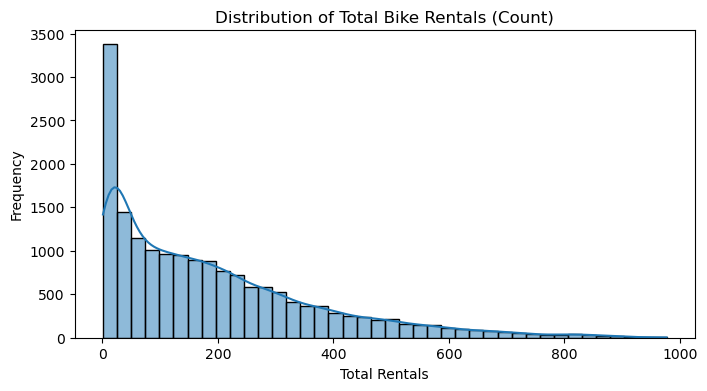

In [22]:
plt.figure(figsize=(8,4))
sns.histplot(df['Count'], bins=40, kde=True)
plt.title("Distribution of Total Bike Rentals (Count)")
plt.xlabel("Total Rentals")
plt.ylabel("Frequency")
plt.show()

# the most bike rentals count is low and the highest frequency is near lower rental counts

**2. Line Chart – Hourly Rental Pattern**

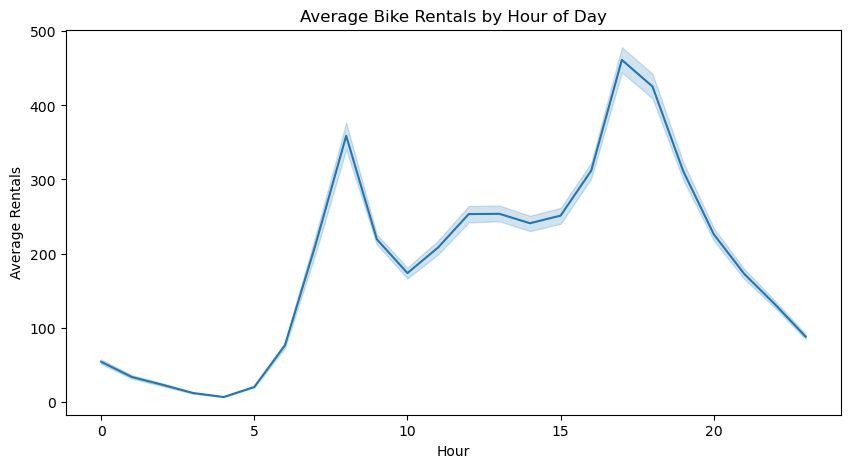

In [23]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Hour', y='Count', data=df, estimator='mean')
plt.title("Average Bike Rentals by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Average Rentals")
plt.show()

# The bike rental is peak at specific hours of the day like at 9 AM and 5 PM (Office hours)

**3. Line Chart – Monthly Trend**

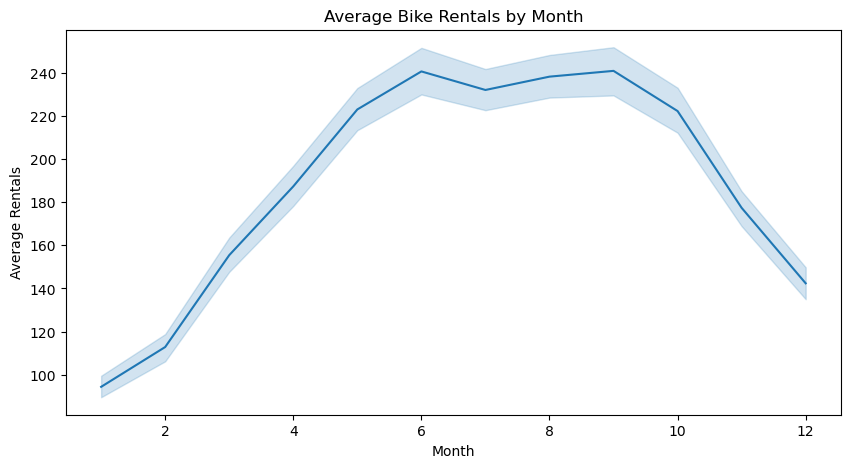

In [24]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Month', y='Count', data=df, estimator='mean')
plt.title("Average Bike Rentals by Month")
plt.xlabel("Month")
plt.ylabel("Average Rentals")
plt.show()

#High rental demand is between the may to october month this is fall season.

**4. Bar Plot – Season vs Bike Demand**

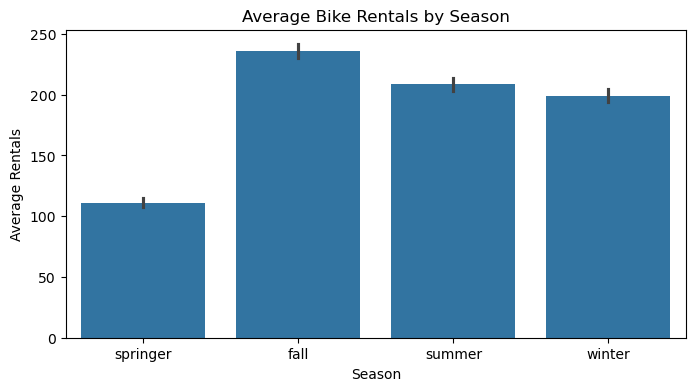

In [25]:
plt.figure(figsize=(8,4))
sns.barplot(x='Season', y='Count', data=df, estimator='mean')
plt.title("Average Bike Rentals by Season")
plt.xlabel("Season")
plt.ylabel("Average Rentals")
plt.show()

# The peak rental is in the fall season
# less rental is in the springer season

**5. Bar Plot – Weather Situation vs Demand**

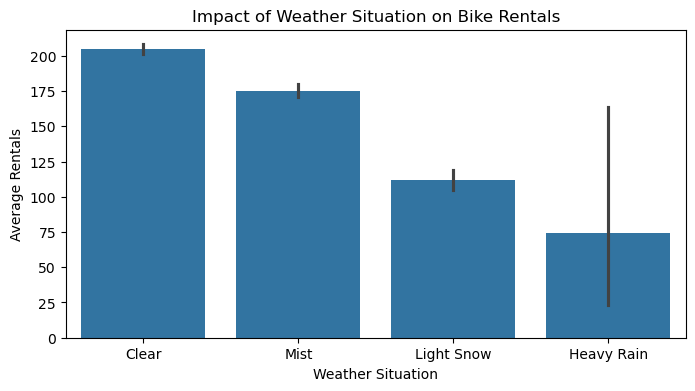

In [26]:
plt.figure(figsize=(8,4))
sns.barplot(x='Weathersit', y='Count', data=df, estimator='mean')
plt.title("Impact of Weather Situation on Bike Rentals")
plt.xlabel("Weather Situation")
plt.ylabel("Average Rentals")
plt.show()

# In the clear weather situation the bike rentals are high
# In the mist weather situation the bike rentals are slightly less compared to clear.

**6. Scatter Plot – Temperature vs Demand**

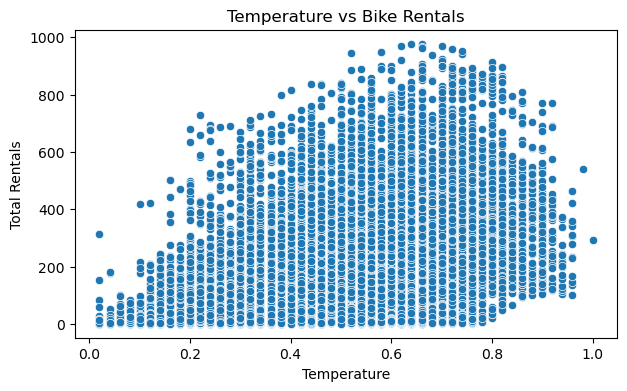

In [27]:
plt.figure(figsize=(7,4))
sns.scatterplot(x='Temp', y='Count', data=df)
plt.title("Temperature vs Bike Rentals")
plt.xlabel("Temperature")
plt.ylabel("Total Rentals")
plt.show()

#Weather variables are key predictors
#Shows positive correlation clearly
#Strengthens feature importance justification

**7. Histogram**

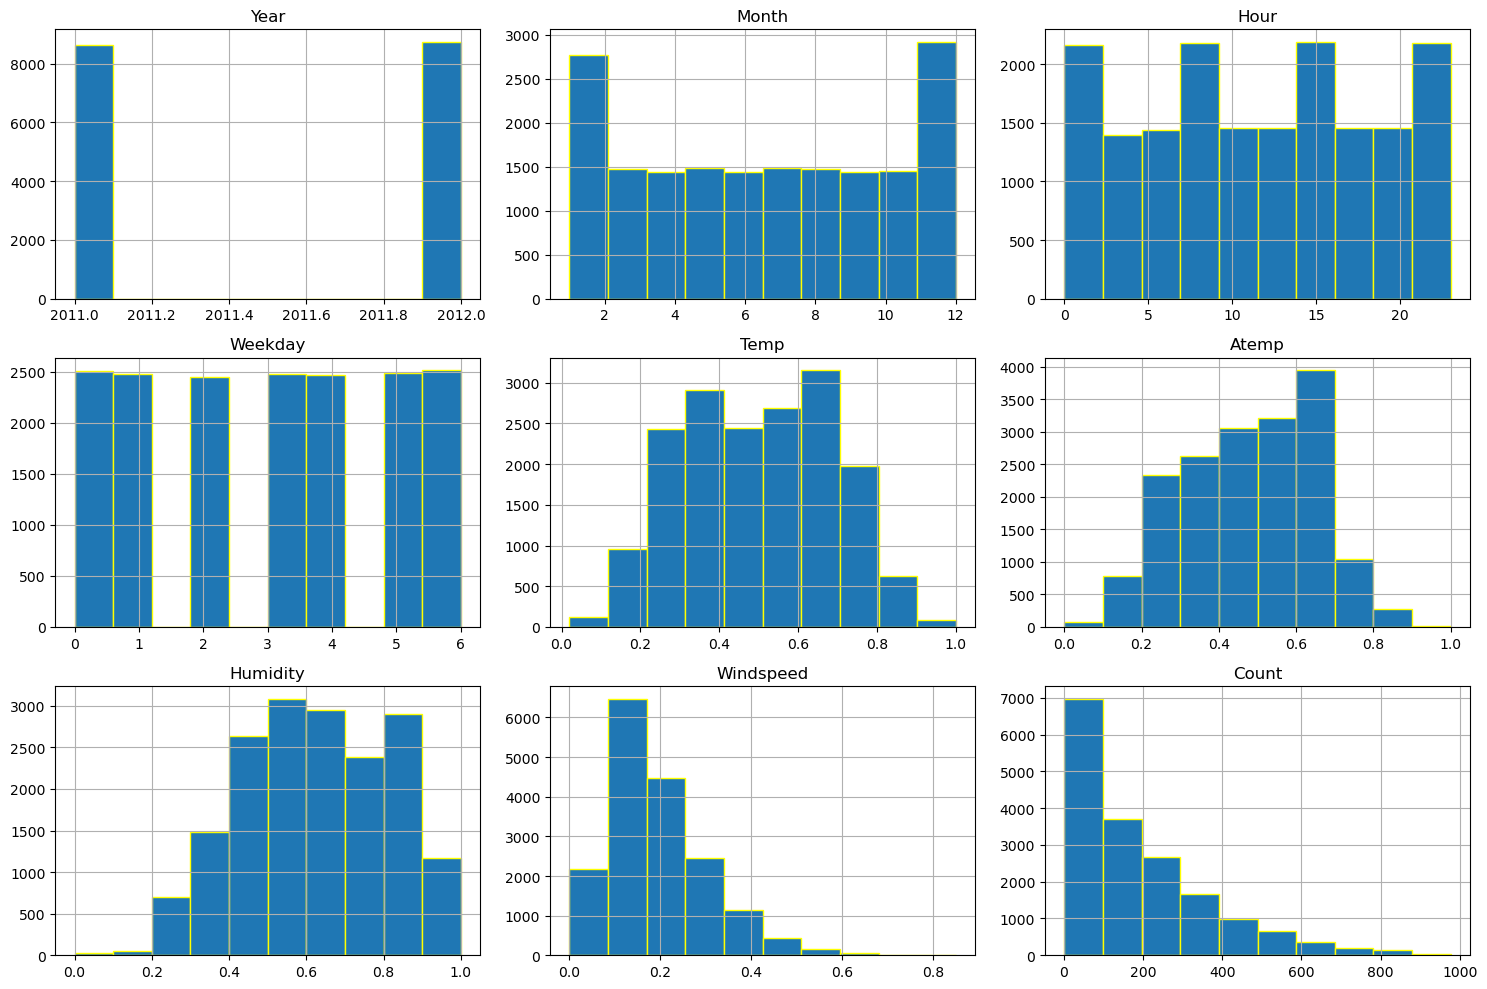

In [28]:
#Histogram visualization of all numeric columns
df.hist(figsize=(15,10),edgecolor='yellow')
plt.tight_layout()
plt.show()

**8. Pairplot**

In [29]:
#sns.pairplot(data=df)

**9. Correlation Heatmap**

<Axes: >

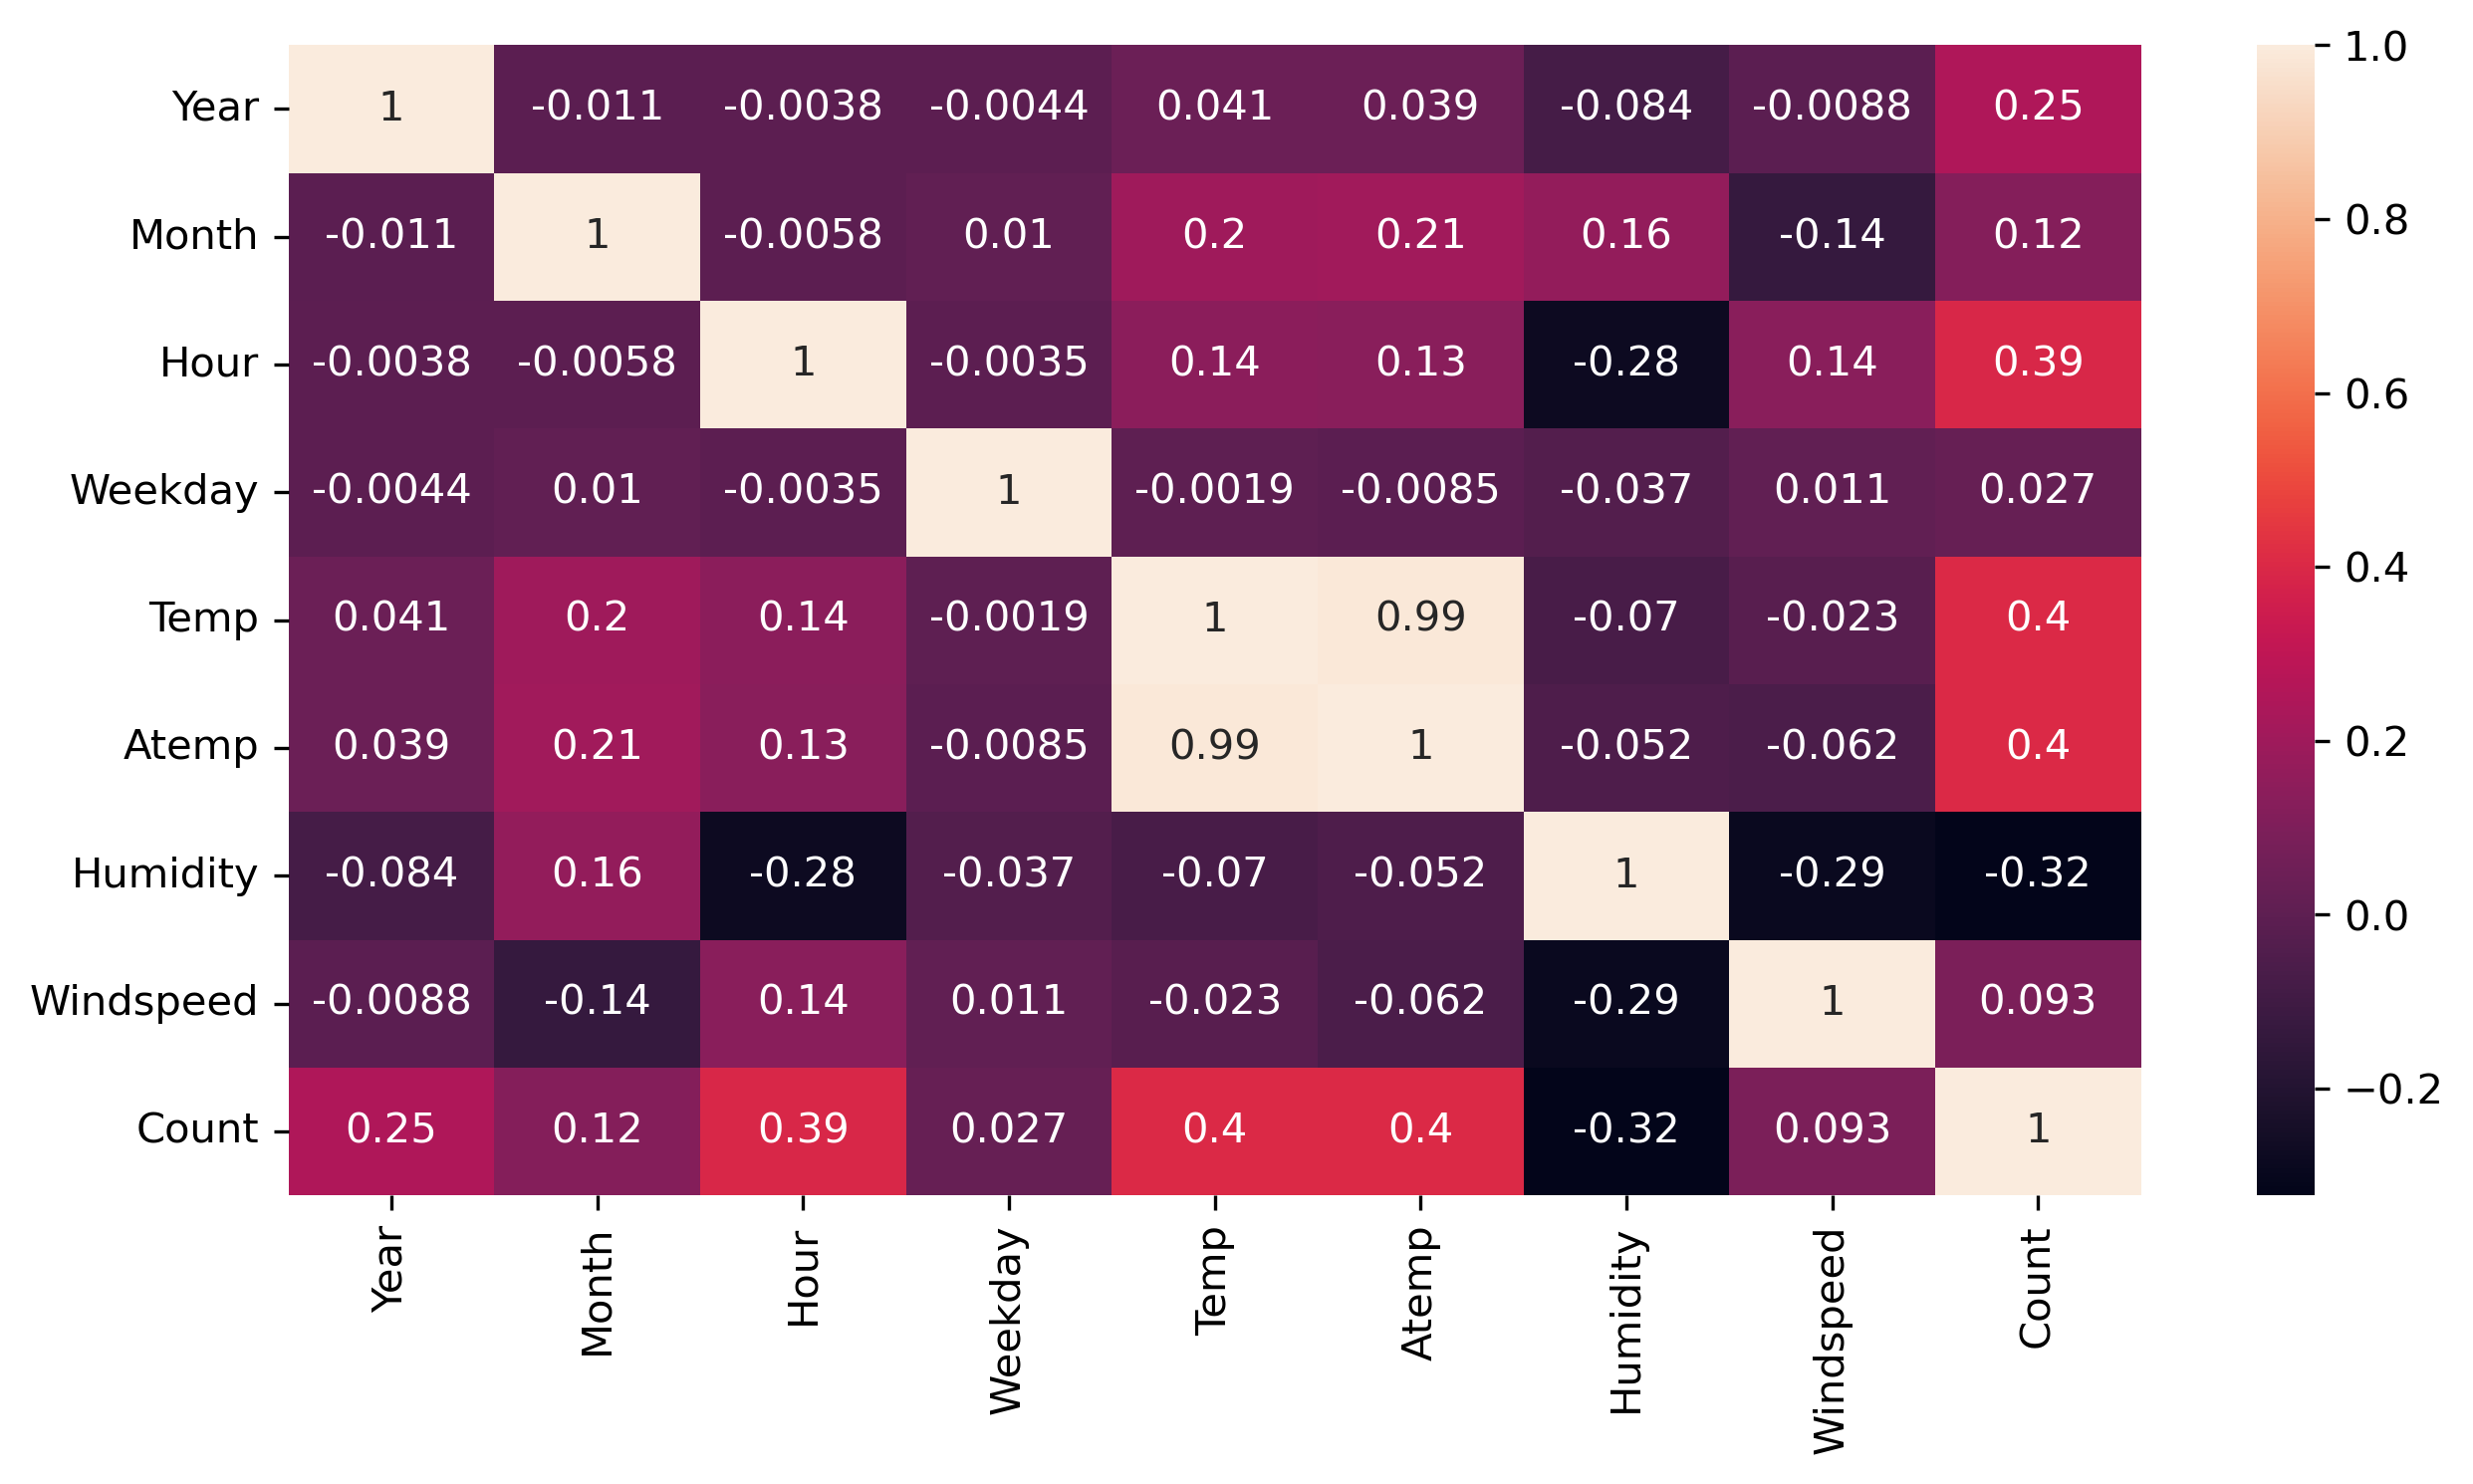

In [30]:
#Correlation Heatmap Visualization
# “The correlation heatmap helps us identify important features, understand feature relationships, and detect multicollinearity before building the model.”
plt.rcParams['figure.figsize'] = (10,5) # RuntimeConfiguration Parameters: size of graph, 10:width, 5:height
plt.rcParams['figure.dpi'] = 300
sns.heatmap(df.corr(numeric_only=True),annot=True)

**10. Boxplot**

<Axes: >

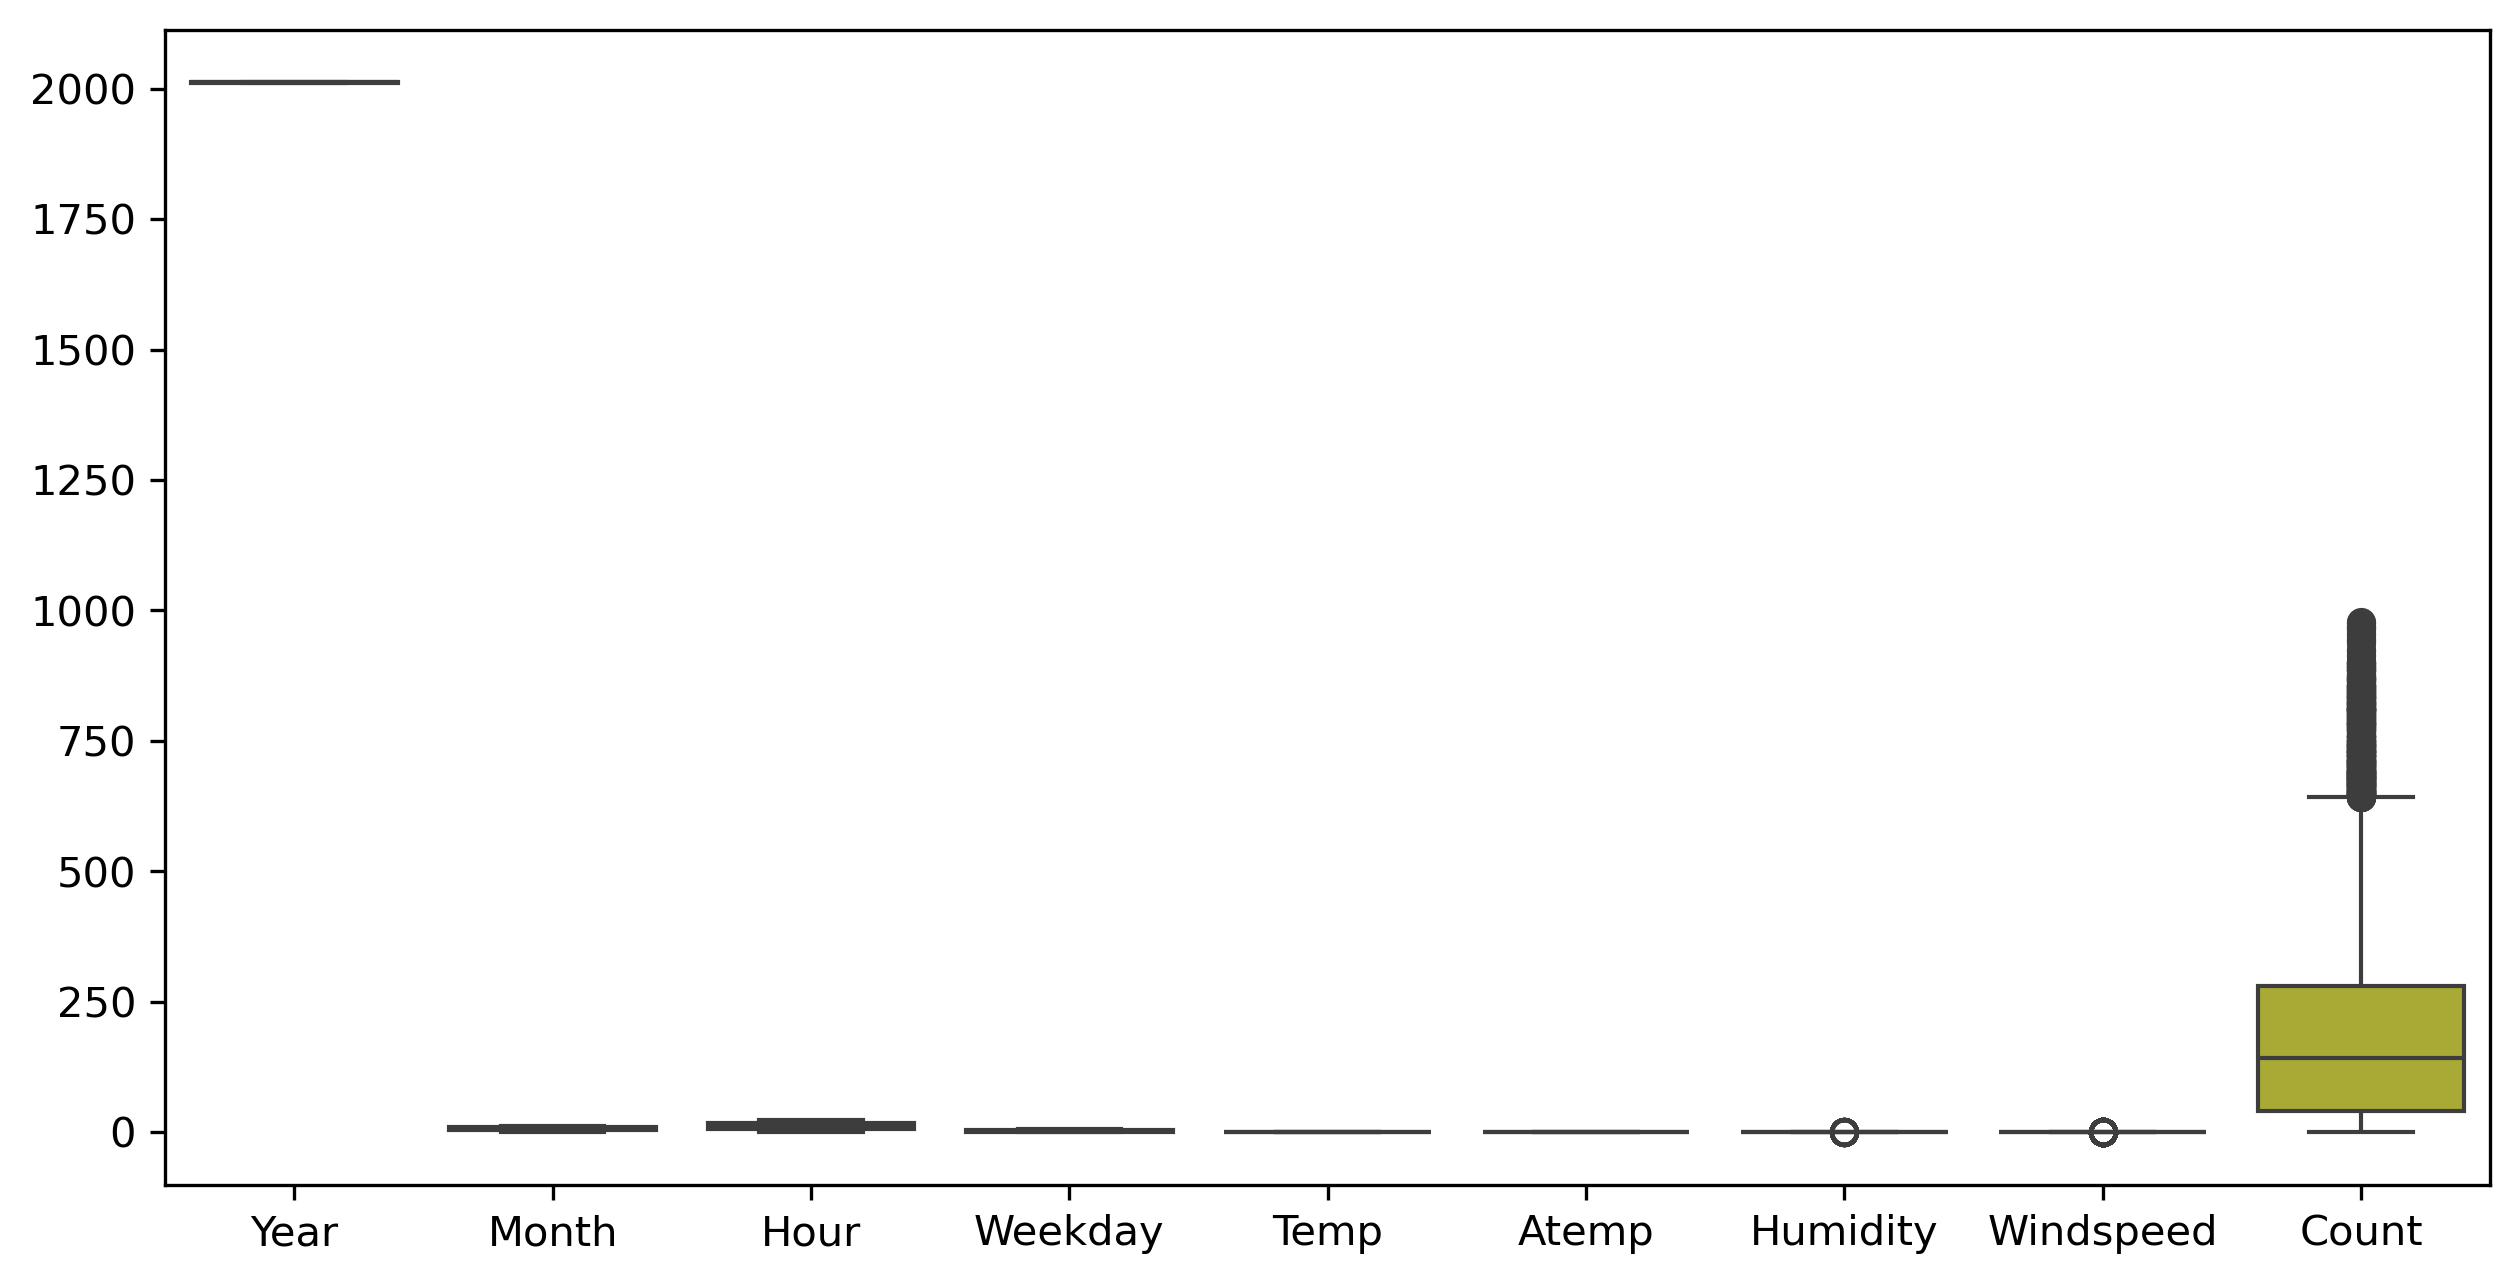

In [31]:
#Boxplot of numeric columns
#Very less presence of outliers in independent column so no need of outlier treatment
sns.boxplot(df)

# **Feature Engineering**

**1. Create a Copy of Dataset**

In [32]:
# Create a copy so original EDA data is not affected
df1 = df.copy()

# Check data shape
df1.shape

(17377, 13)

**2. Create Peak Hour Feature**

In [33]:
# Peak hours based on daily commute time
#    Bike demand is usually high during office hours
#    Morning: 7–9 AM, Evening: 5–7 PM
df1['is_peak_hour'] = df1['Hour'].apply(lambda x: 1 if x in [7, 8, 9, 17, 18, 19] else 0)

**3. Create Weekend Feature**

In [34]:
# Weekend indicator (Saturday & Sunday)
# Weekend usage pattern is different from weekdays
# Saturday (6) and Sunday (0) are treated as weekend
df1['is_weekend'] = df1['Weekday'].apply(lambda x: 1 if x in [0, 6] else 0)

**4. Encoding**

In [35]:
# Mapping No with 0 and Yes with 1
df1['Holiday'] = df1['Holiday'].map({'No': 0, 'Yes': 1})

In [36]:
# Mapping No work with 0 and Working Day with 1
df1['Workingday'] = df1['Workingday'].map({'No work': 0, 'Working Day': 1})

In [37]:
# Converting Categorical (Season) column to numeric using OHE
df1 = pd.get_dummies(df1, columns=['Season'], drop_first=True)

In [38]:
# Converting Categorical (Weathersit) column to numeric using OHE
df1 = pd.get_dummies(df1, columns=['Weathersit'], drop_first=True)

In [39]:
df1

,Year,Month,Hour,Holiday,Weekday,Workingday,Temp,Atemp,Humidity,Windspeed,Count,is_peak_hour,is_weekend,Season_springer,Season_summer,Season_winter,Weathersit_Heavy Rain,Weathersit_Light Snow,Weathersit_Mist
Date,,,,,,,,,,,,,,,,,,,
2011-01-01,2011,1,0,0,6,0,0.24,0.2879,0.81,0.0000,16,0,1,True,False,False,False,False,False
2011-01-01,2011,1,1,0,6,0,0.22,0.2727,0.80,0.0000,40,0,1,True,False,False,False,False,False
2011-01-01,2011,1,2,0,6,0,0.22,0.2727,0.63,0.0000,32,0,1,True,False,False,False,False,False
2011-01-01,2011,1,3,0,6,0,0.24,0.2879,0.75,0.0000,13,0,1,True,False,False,False,False,False
2011-01-01,2011,1,4,0,6,0,0.24,0.2879,0.75,0.0000,1,0,1,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31,2012,12,19,0,1,1,0.26,0.2576,0.60,0.1642,119,1,0,True,False,False,False,False,True
2012-12-31,2012,12,20,0,1,1,0.26,0.2576,0.60,0.1642,89,0,0,True,False,False,False,False,True
2012-12-31,2012,12,21,0,1,1,0.50,0.2576,0.60,0.1642,90,0,0,True,False,False,False,False,False


In [40]:
# Convert all boolean columns to 0/1
bool_cols = df1.select_dtypes(include='bool').columns
df1[bool_cols] = df1[bool_cols].astype(int)

In [41]:
#dropped Temp column because Temp is highly Correlated with Atemp column it will create the multicollinearity problem
df1.drop(columns=['Temp'],inplace=True)

In [42]:
#Dataset ready to use for model building
df1

,Year,Month,Hour,Holiday,Weekday,Workingday,Atemp,Humidity,Windspeed,Count,is_peak_hour,is_weekend,Season_springer,Season_summer,Season_winter,Weathersit_Heavy Rain,Weathersit_Light Snow,Weathersit_Mist
Date,,,,,,,,,,,,,,,,,,
2011-01-01,2011,1,0,0,6,0,0.2879,0.81,0.0000,16,0,1,1,0,0,0,0,0
2011-01-01,2011,1,1,0,6,0,0.2727,0.80,0.0000,40,0,1,1,0,0,0,0,0
2011-01-01,2011,1,2,0,6,0,0.2727,0.63,0.0000,32,0,1,1,0,0,0,0,0
2011-01-01,2011,1,3,0,6,0,0.2879,0.75,0.0000,13,0,1,1,0,0,0,0,0
2011-01-01,2011,1,4,0,6,0,0.2879,0.75,0.0000,1,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31,2012,12,19,0,1,1,0.2576,0.60,0.1642,119,1,0,1,0,0,0,0,1
2012-12-31,2012,12,20,0,1,1,0.2576,0.60,0.1642,89,0,0,1,0,0,0,0,1
2012-12-31,2012,12,21,0,1,1,0.2576,0.60,0.1642,90,0,0,1,0,0,0,0,0


# **Model Building**

In [43]:
# Assigned the data.......independent columns to X and Dependent Column to y
X = df1.drop(columns=['Count'])
Y = df1['Count']

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=False)

num_features = ['Year', 'Month', 'Hour', 'Weekday', 'Atemp', 'Humidity', 'Windspeed']

x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()


scaler = StandardScaler()
x_train_scaled[num_features] = scaler.fit_transform(x_train[num_features])
x_test_scaled[num_features] = scaler.transform(x_test[num_features])

# **1. Linear Regression**

In [45]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(x_train_scaled, y_train)

LinearRegression()

In [46]:
y_pred = model1.predict(x_test_scaled)

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}, MAE: {mae}, R²: {r2}")

RMSE: 156.72186781505187, MAE: 115.75362704299981, R²: 0.49475523709390645


# **2. Decision Tree**

In [48]:
from sklearn.tree import DecisionTreeRegressor

model2 = DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42)

model2.fit(x_train_scaled, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42)

In [49]:
y_pred = model2.predict(x_test_scaled)

In [50]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}, MAE: {mae}, R²: {r2}")

RMSE: 88.35685525535872, MAE: 57.72337557052809, R²: 0.8394082897232025


# **3. Random Forest**

In [51]:
from sklearn.ensemble import RandomForestRegressor

model3 = RandomForestRegressor(n_estimators=300, max_depth=15, min_samples_split=5, min_samples_leaf=3, random_state=42, n_jobs=-1)

model3.fit(x_train_scaled, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=3, min_samples_split=5,
                      n_estimators=300, n_jobs=-1, random_state=42)

In [52]:
y_pred = model3.predict(x_test_scaled)

In [53]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}, MAE: {mae}, R²: {r2}")

RMSE: 75.54099150978428, MAE: 49.229600802095845, R²: 0.8826162487178904


# **4. Support Vector Machine (SVM)**

In [54]:
from sklearn.svm import SVR

model4 = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1 )

model4.fit(x_train_scaled, y_train)

SVR(C=100, gamma=0.1)

In [55]:
y_pred = model4.predict(x_test_scaled)

In [56]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}, MAE: {mae}, R²: {r2}")

RMSE: 113.96884347023504, MAE: 78.00410845283686, R²: 0.7328132575878772



# **5. Gradient Boosting**


In [57]:
from sklearn.ensemble import GradientBoostingRegressor

model5 = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=10, subsample=0.8, random_state=42)

model5.fit(x_train_scaled, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=10, n_estimators=300,
                          random_state=42, subsample=0.8)

In [58]:
y_pred = model5.predict(x_test_scaled)

In [59]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}, MAE: {mae}, R²: {r2}")

RMSE: 68.80705561342954, MAE: 44.142224103366665, R²: 0.9026112995785233


# **6. XGBoost**

In [66]:
!pip install xgboost
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(x_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=-1, num_parallel_tree=None, ...)

In [67]:
y_pred = xgb_model.predict(x_test_scaled)

In [68]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}, MAE: {mae}, R²: {r2}")

RMSE: 65.09750049205039, MAE: 42.11461639404297, R²: 0.9128291606903076


In [69]:
# Predictions
y_train_pred = xgb_model.predict(x_train_scaled)
y_test_pred  = xgb_model.predict(x_test_scaled)

# Train metrics
train_r2   = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae  = mean_absolute_error(y_train, y_train_pred)

# Test metrics
test_r2   = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae  = mean_absolute_error(y_test, y_test_pred)

print("TRAIN -> R2:", train_r2, " RMSE:", train_rmse, " MAE:", train_mae)
print("TEST  -> R2:", test_r2,  " RMSE:", test_rmse,  " MAE:", test_mae)

TRAIN -> R2: 0.9787622690200806  RMSE: 24.329842234271297  MAE: 15.952438354492188
TEST  -> R2: 0.9128291606903076  RMSE: 65.09750049205039  MAE: 42.11461639404297


# **Comparison Table**

In [70]:
results = []

models = {
    "Linear Regression": model1,
    "Decision Tree": model2,
    "Random Forest": model3,
    "Support Vector Machine": model4,
    "Gradient Boosting": model5,
    "XGBoost": xgb_model
}

for name, model in models.items():
    y_pred = model.predict(x_test_scaled)
    results.append([
        name,
        r2_score(y_test, y_pred),
        np.sqrt(mean_squared_error(y_test, y_pred)),
        mean_absolute_error(y_test, y_pred)
    ])

results_df = pd.DataFrame(
    results,
    columns=["Models", "R2 Score", "RMSE", "MAE"]
)

results_df.sort_values(by="R2 Score", ascending=False)

,Models,R2 Score,RMSE,MAE
5,XGBoost,0.912829,65.097500,42.114616
4,Gradient Boosting,0.902611,68.807056,44.142224
2,Random Forest,0.882616,75.540992,49.229601
1,Decision Tree,0.839408,88.356855,57.723376
3,Support Vector Machine,0.732813,113.968843,78.004108
0,Linear Regression,0.494755,156.721868,115.753627


From the above comparison table the XGBoost model gives good r2 and less errors than other models, so we are finalizing the XGBoost model for the deployment.

In [73]:
# Save the trained scaler and model for deployment
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)